In [33]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from flask import request
from flask import jsonify
from flask import Flask
import base64
import io
from PIL import Image
%matplotlib inline

In [2]:
train_path = '/home/deep/Desktop/cat-and-dog/train'
test_path = '/home/deep/Desktop/cat-and-dog/test'
valid_path = '/home/deep/Desktop/cat-and-dog/valid'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224), classes=['cat','dog'],batch_size=5)

Found 60 images belonging to 2 classes.


In [4]:
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['cat','dog'],batch_size=10)

Found 20 images belonging to 2 classes.


In [5]:
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224), classes=['cat','dog'],batch_size=5)

Found 40 images belonging to 2 classes.


In [6]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [7]:
imgs,labels = next(train_batches)

/home/deep/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


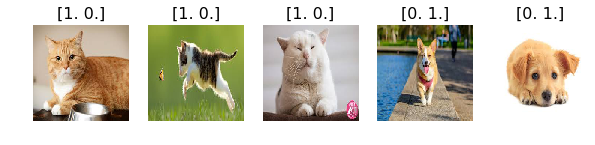

In [8]:
plots(imgs,titles=labels)

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(3,224,224)),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [10]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit_generator(train_batches, steps_per_epoch=3,
                   validation_data=valid_batches, validation_steps=3, epochs=20, verbose=2)

Epoch 1/20
 - 1s - loss: 5.5703 - acc: 0.6000 - val_loss: 7.5218 - val_acc: 0.5333
Epoch 2/20
 - 1s - loss: 11.8199 - acc: 0.2667 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 3/20
 - 1s - loss: 6.4472 - acc: 0.6000 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/20
 - 1s - loss: 6.4472 - acc: 0.6000 - val_loss: 7.5218 - val_acc: 0.5333
Epoch 5/20
 - 1s - loss: 7.5218 - acc: 0.5333 - val_loss: 7.5218 - val_acc: 0.5333
Epoch 6/20
 - 1s - loss: 7.5218 - acc: 0.5333 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 7/20
 - 1s - loss: 9.6709 - acc: 0.4000 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 8/20
 - 1s - loss: 7.5218 - acc: 0.5333 - val_loss: 8.5963 - val_acc: 0.4667
Epoch 9/20
 - 1s - loss: 7.5218 - acc: 0.5333 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 10/20
 - 1s - loss: 9.6709 - acc: 0.4000 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 11/20
 - 1s - loss: 8.5963 - acc: 0.4667 - val_loss: 8.5963 - val_acc: 0.4667
Epoch 12/20
 - 1s - loss: 6.4472 - acc: 0.6000 - val_loss: 8.5963 - val_acc: 0.466

/home/deep/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


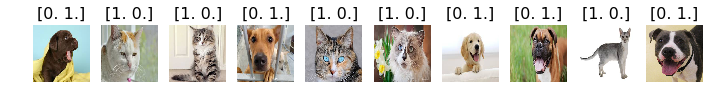

In [12]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [13]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 0.], dtype=float32)

In [14]:
predictions = model.predict_generator(test_batches, steps=2, verbose=0)

In [15]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [16]:
vgg16_model = keras.applications.vgg16.VGG16()

/home/deep/anaconda3/lib/python3.6/site-packages/keras/utils/conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


In [17]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
__________

In [18]:
type(vgg16_model)

keras.engine.training.Model

In [19]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 256, 56, 56)       295168    
__________

In [21]:
model.layers.pop()

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 256, 56, 56)       295168    
__________

In [23]:
for layer in model.layers:
    layer.trainable = False

In [24]:
model.add(Dense(2, activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 256, 56, 56)       295168    
__________

In [26]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit_generator(train_batches, steps_per_epoch=3,
                   validation_data=valid_batches, validation_steps=3, epochs=20, verbose=2)

Epoch 1/20
 - 7s - loss: 0.6947 - acc: 0.4000 - val_loss: 0.6978 - val_acc: 0.4000
Epoch 2/20
 - 9s - loss: 0.6990 - acc: 0.4667 - val_loss: 0.7027 - val_acc: 0.1333
Epoch 3/20
 - 9s - loss: 0.6956 - acc: 0.5333 - val_loss: 0.6921 - val_acc: 0.6000
Epoch 4/20
 - 9s - loss: 0.6996 - acc: 0.5333 - val_loss: 0.7023 - val_acc: 0.3333
Epoch 5/20
 - 9s - loss: 0.6985 - acc: 0.4000 - val_loss: 0.6932 - val_acc: 0.4000
Epoch 6/20
 - 9s - loss: 0.6901 - acc: 0.5333 - val_loss: 0.7004 - val_acc: 0.5333
Epoch 7/20
 - 9s - loss: 0.6938 - acc: 0.5333 - val_loss: 0.6949 - val_acc: 0.4667
Epoch 8/20
 - 9s - loss: 0.7038 - acc: 0.4667 - val_loss: 0.6927 - val_acc: 0.5333
Epoch 9/20
 - 9s - loss: 0.6870 - acc: 0.6667 - val_loss: 0.6980 - val_acc: 0.4000
Epoch 10/20
 - 9s - loss: 0.6998 - acc: 0.3333 - val_loss: 0.6904 - val_acc: 0.6000
Epoch 11/20
 - 9s - loss: 0.6900 - acc: 0.6000 - val_loss: 0.6997 - val_acc: 0.4667
Epoch 12/20
 - 9s - loss: 0.7069 - acc: 0.3333 - val_loss: 0.6992 - val_acc: 0.3333
E

/home/deep/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


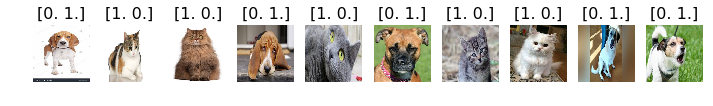

In [28]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [29]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0.], dtype=float32)

In [30]:
predictions = model.predict_generator(test_batches, steps=2, verbose=0)

In [31]:
predictions

array([[0.48336434, 0.51663566],
       [0.48985782, 0.5101422 ],
       [0.50515157, 0.4948484 ],
       [0.5210737 , 0.4789263 ],
       [0.50759536, 0.49240467],
       [0.5034552 , 0.49654478],
       [0.5048369 , 0.49516308],
       [0.5172526 , 0.4827474 ],
       [0.4951082 , 0.5048918 ],
       [0.49149013, 0.5085099 ],
       [0.520426  , 0.47957402],
       [0.50008905, 0.49991095],
       [0.49858564, 0.50141436],
       [0.50670904, 0.49329093],
       [0.48981458, 0.5101854 ],
       [0.49087954, 0.50912046],
       [0.50848335, 0.49151665],
       [0.4957625 , 0.5042375 ],
       [0.49233702, 0.50766295],
       [0.49915305, 0.5008469 ]], dtype=float32)

In [40]:
model.save_weights('vgg16catdogmodel.h5')

 * Model loaded
